In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import seaborn as sns

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
def plot_DID2(actual_2019, actual_2023, predict_2023,pre_year, post_year, predicted_change, actual_change):
    # 0->actual, 1->predict
    

    set_actual = pd.Series(['actual','actual','actual','actual','actual','actual','actual'], 
                           index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    set_baseline = pd.Series(['baseline','baseline','baseline','baseline','baseline','baseline','baseline'], 
                             index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    set_0 = pd.Series([0,0,0,0,0,0,0], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    set_1 = pd.Series([1,1,1,1,1,1,1], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])

    df = pd.DataFrame(columns=['y', 'group', 't', 'unit', 'treatment'])
    
    
    # baseline
    predict_2019 = actual_2019.copy()
    predict_2019['y'] = predict_2019[pre_year]
    predict_2019['state'] = pd.Series(['NSW','VIC','QLD','SA','WA','TAS','NT'], index=['NSW'+actual_change,'VIC'+actual_change,'QLD'+actual_change,'SA'+actual_change,'WA'+actual_change,'TAS'+actual_change,'NT'+actual_change])
    predict_2019 = predict_2019.set_index('state')
    predict_2019['group'] = set_baseline
    predict_2019['t'] = set_0
    predict_2019['unit'] = pd.Series([0,1,2,3,4,5,6], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    predict_2019['treated'] = set_0


    
    predict_2023['y'] = predict_2023[post_year]
    predict_2023['state'] = pd.Series(['NSW','VIC','QLD','SA','WA','TAS','NT'], index=['NSW_predicted'+predicted_change,'VIC_predicted'+predicted_change,'QLD_predicted'+predicted_change,'SA_predicted'+predicted_change,'WA_predicted'+predicted_change,'TAS_predicted'+predicted_change,'NT_predicted'+predicted_change])
    predict_2023 = predict_2023.set_index('state')
    predict_2023['group'] = set_baseline
    predict_2023['t'] = set_1
    predict_2023['unit'] = pd.Series([0,1,2,3,4,5,6], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    predict_2023['treated'] = set_0



    # actual
    actual_2019['y'] = actual_2019[pre_year]
    actual_2019['state'] = pd.Series(['NSW','VIC','QLD','SA','WA','TAS','NT'], index=['NSW'+actual_change,'VIC'+actual_change,'QLD'+actual_change,'SA'+actual_change,'WA'+actual_change,'TAS'+actual_change,'NT'+actual_change])
    actual_2019 = actual_2019.set_index('state')
    actual_2019['group'] = set_actual
    actual_2019['t'] = set_0
    actual_2019['unit'] = pd.Series([7,8,9,10,11,12,13], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    actual_2019['treated'] = set_1


    actual_2023['y'] = actual_2023[post_year]
    actual_2023['state'] = pd.Series(['NSW','VIC','QLD','SA','WA','TAS','NT'], index=['NSW'+actual_change,'VIC'+actual_change,'QLD'+actual_change,'SA'+actual_change,'WA'+actual_change,'TAS'+actual_change,'NT'+actual_change])
    actual_2023 = actual_2023.set_index('state')
    actual_2023['group'] = set_actual
    actual_2023['t'] = set_1
    actual_2023['unit'] = pd.Series([7,8,9,10,11,12,13], index=['NSW','VIC','QLD','SA','WA','TAS','NT'])
    actual_2023['treated'] = set_1

    frames = [predict_2019, predict_2023, actual_2019, actual_2023]
    result = pd.concat(frames)

    ax = sns.lineplot(result, x="t", y="y", hue="group", units="unit", estimator=None)
    sns.scatterplot(result, x="t", y="y", hue="group")
    
    ax.set_xticks([-0.2,-0.2,1.2])


    if predicted_change != '':
        ax.set(
            xlabel="time",
            ylabel="dWPI/dt",
            #ylabel="WPI",
            xticks=[0,1],
            xticklabels=["2019 Q3", "2021 Q3"]
        )

    if predicted_change == '':
        ax.set(
        xlabel="time",
        ylabel="WPI",
        #ylabel="WPI",
        xticks=[0,1],
        xticklabels=["2019 Q3", "2021 Q3"]
    )
    
    plt.savefig('state2 DID.png')

In [3]:
# wages_path = 'wages.xlsx'

# states = ['NSW','VIC','QLD','SA','WA','TAS','NT']
# pre_year = '2019-03-01'
# post_year = '2023-03-01'

# # actual observed19, baseline19 and observed23 and 
# wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW_actual_change','VIC_actual_change','QLD_actual_change','SA_actual_change','WA_actual_change','TAS_actual_change','NT_actual_change'])
# wages = pd.DataFrame(wages)
# wages = wages.set_index('time').asfreq('QS-DEC')
# actual_2019 = wages.loc[pre_year].to_frame()
# actual_2023 = wages.loc[post_year].to_frame()


# # actual baseline 23
# wages_predicted = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW_predicted_change','VIC_predicted_change','QLD_predicted_change','SA_predicted_change','WA_predicted_change','TAS_predicted_change','NT_predicted_change'])
# wages_predicted = pd.DataFrame(wages_predicted)
# wages_predicted = wages_predicted.set_index('time').asfreq('QS-DEC')
# predict_2023 =  wages_predicted.loc[post_year].to_frame()

# # Read the Excel file into a pandas DataFrame


# plot_DID2(actual_2019, actual_2023, predict_2023, pre_year, post_year, '_change', '_actual_change') 

In [4]:
# wages_path = 'wages.xlsx'

# states = ['NSW','VIC','QLD','SA','WA','TAS','NT']
# pre_year = '2019-03-01'
# post_year = '2020-03-01'

# # actual observed19, baseline19 and observed23 and 
# wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW','VIC','QLD','SA','WA','TAS','NT'])
# wages = pd.DataFrame(wages)
# wages = wages.set_index('time').asfreq('QS-DEC')
# actual_2019 = wages.loc[pre_year].to_frame()
# actual_2023 = wages.loc[post_year].to_frame()


# # actual baseline 23
# wages_predicted = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time','NSW_predicted','VIC_predicted','QLD_predicted','SA_predicted','WA_predicted','TAS_predicted','NT_predicted'])
# wages_predicted = pd.DataFrame(wages_predicted)
# wages_predicted = wages_predicted.set_index('time').asfreq('QS-DEC')
# predict_2023 =  wages_predicted.loc[post_year].to_frame()

# # Read the Excel file into a pandas DataFrame


# plot_DID2(actual_2019, actual_2023, predict_2023, pre_year, post_year, '','')

E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

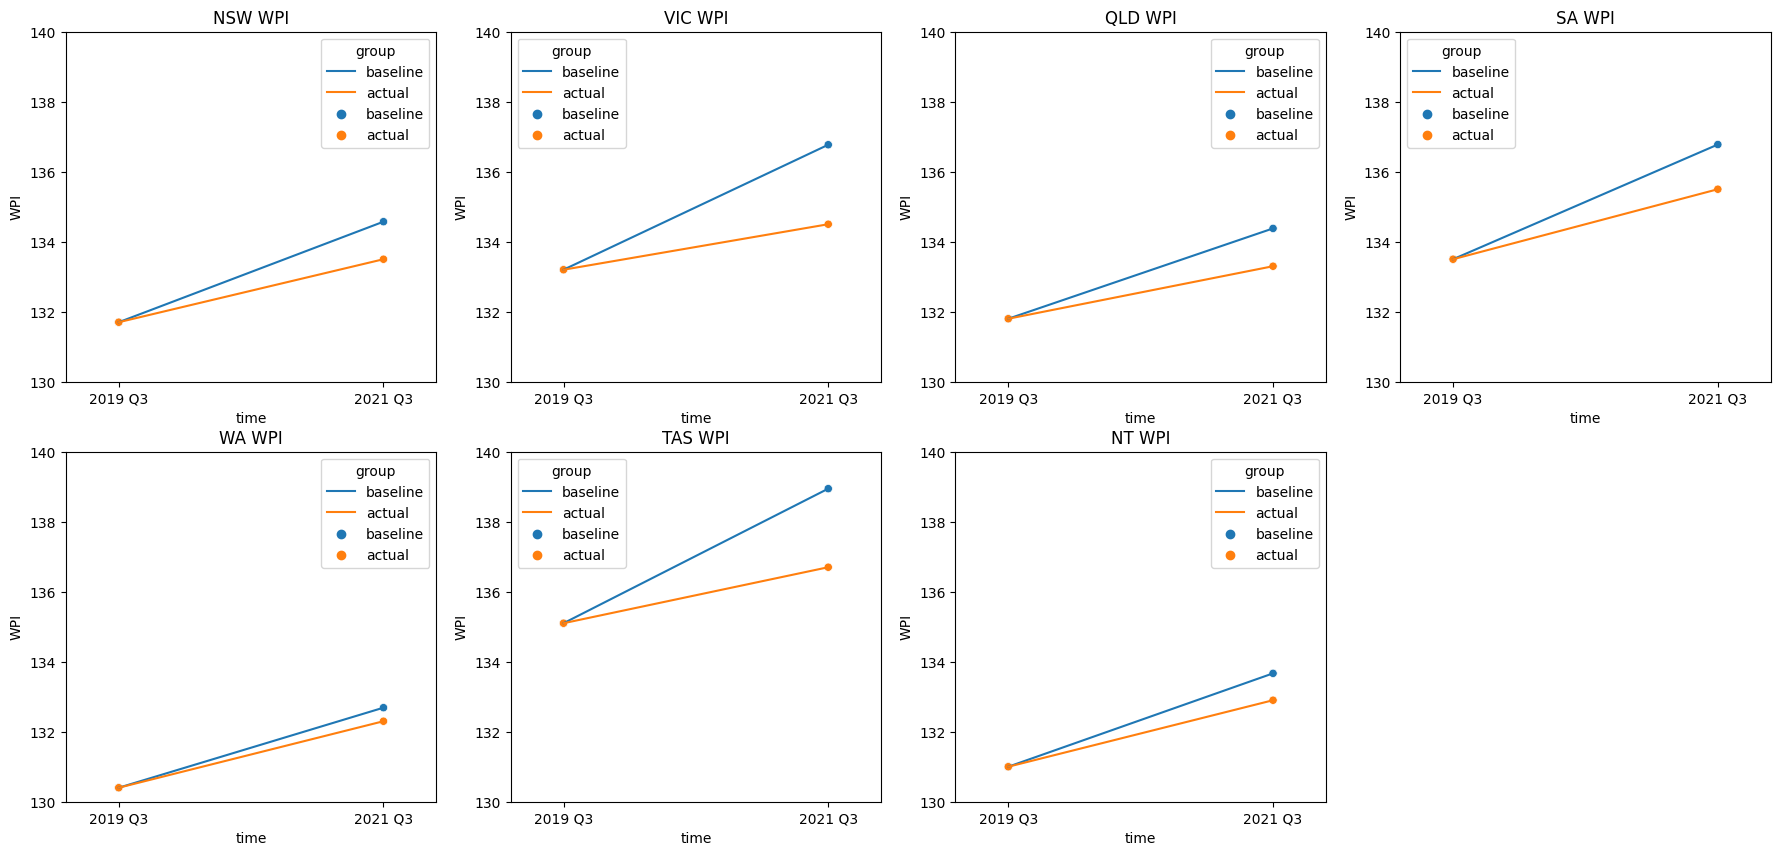

In [5]:
wages_path = 'wages.xlsx'
states = ['NSW','VIC','QLD','SA','WA','TAS','NT']
pre_year = '2019-09-01'
post_year = '2020-09-01'
plt.figure(figsize = (22,10))

for i in range(0,7):

    state = states[i]

    # actual observed19, baseline19 and observed23 and 
    wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time',state])
    wages = pd.DataFrame(wages)
    wages = wages.set_index('time').asfreq('QS-DEC')
    actual_2019 = wages.loc[pre_year].to_frame()
    actual_2023 = wages.loc[post_year].to_frame()
    
    
    # actual baseline 23
    wages_predicted = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time',state+'_predicted'])
    wages_predicted = pd.DataFrame(wages_predicted)
    wages_predicted = wages_predicted.set_index('time').asfreq('QS-DEC')
    predict_2023 =  wages_predicted.loc[post_year].to_frame()

    plt.subplot(2,4,i+1)
    plt.title(state + ' WPI')
    plt.ylim(130, 140)
    plot_DID2(actual_2019, actual_2023, predict_2023, pre_year, post_year,'','')

plt.savefig('states WPI DID.png')



E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\Uni\research\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

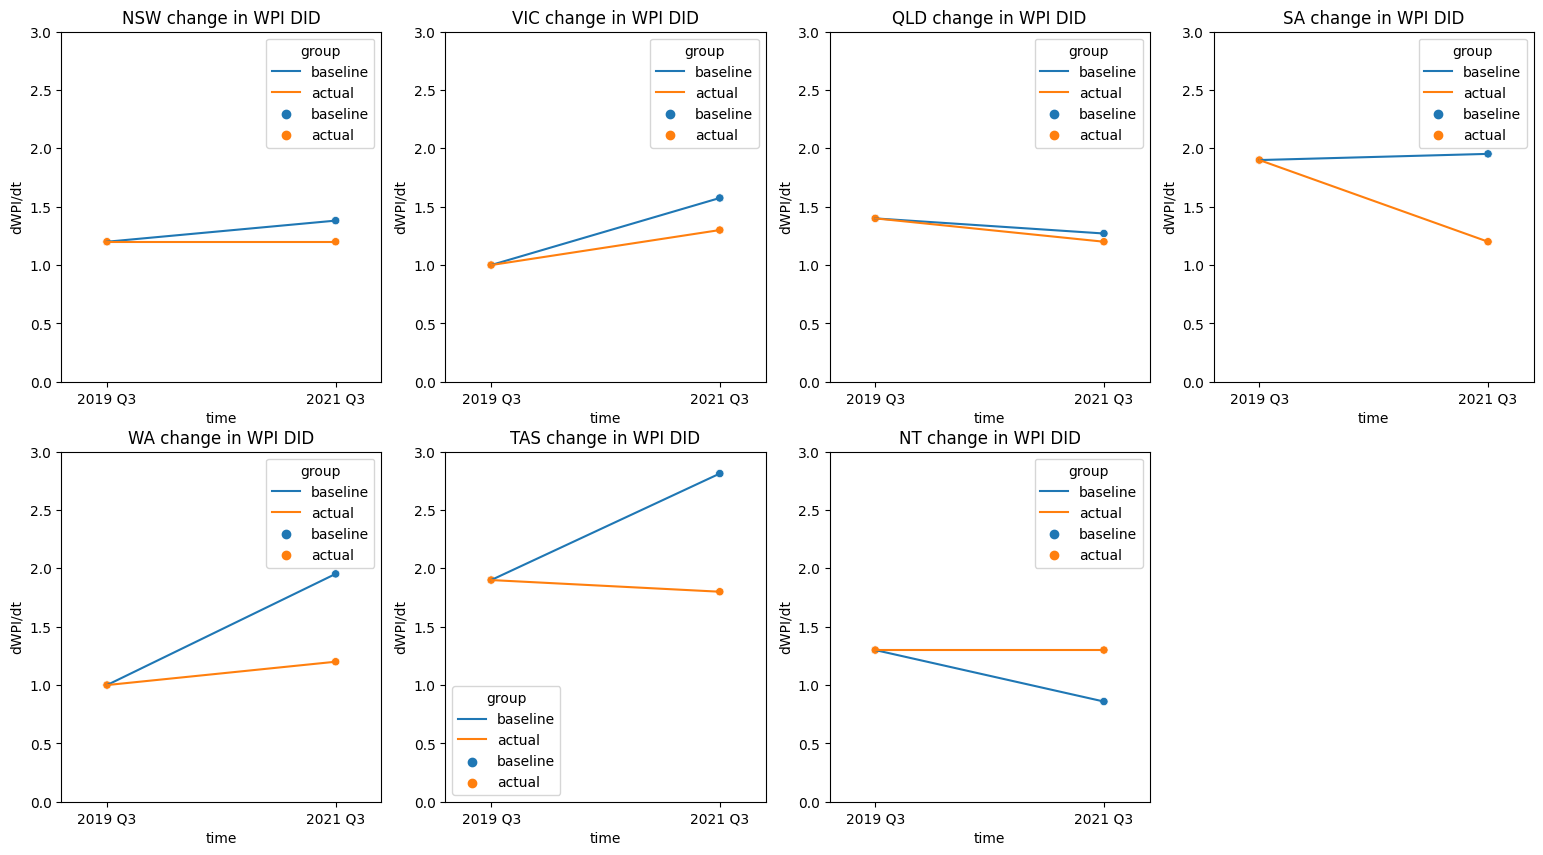

In [6]:
wages_path = 'wages.xlsx'
states = ['NSW','VIC','QLD','SA','WA','TAS','NT']
pre_year = '2019-09-01'
post_year = '2021-09-01'
plt.figure(figsize = (19,10))

for i in range(0,7):

    state = states[i]

    # actual observed19, baseline19 and observed23 and 
    wages = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time', state+'_actual_change'])
    wages = pd.DataFrame(wages)
    wages = wages.set_index('time').asfreq('QS-DEC')
    actual_2019 = wages.loc[pre_year].to_frame()
    actual_2023 = wages.loc[post_year].to_frame()
    
    
    # actual baseline 23
    wages_predicted = pd.read_excel(wages_path, engine='openpyxl', usecols = ['time',state+'_predicted_change'])
    wages_predicted = pd.DataFrame(wages_predicted)
    wages_predicted = wages_predicted.set_index('time').asfreq('QS-DEC')
    predict_2023 =  wages_predicted.loc[post_year].to_frame()

    plt.subplot(2,4,i+1)
    plt.title(state + ' change in WPI DID')
    plt.ylim(0, 3)
    plot_DID2(actual_2019, actual_2023, predict_2023, pre_year, post_year, '_change', '_actual_change') 

plt.savefig('states change in WPI DID.png')
